# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [23]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

Reviews = []
Comments = []

for p in range(1, pages + 1):

    print(f"Scraping page {p}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{p}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content of each page
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    ## Scrape written reviews:
    writtenReviews = parsed_content.find_all("div", {"class":"text_content"})
    for i in range(len(writtenReviews)):
        ## Clean the format of each written review:
        entry = writtenReviews[i].get_text().split("|")
        if len(entry)==2:
            writtenReviews[i] = entry[1].lstrip()
    Comments += writtenReviews
        
    ## Scrape the statistics of each review:
    parsed_stats = parsed_content.find_all("div",{ "class":"review-stats"})
    parsed_stats
    
    headers_values = []
    stars_values = []
    chars_values = []
    for i in range(len(parsed_stats)):

        ## 1) headers for each review:
        headers_names = parsed_stats[i].find_all("td", {"class":"review-rating-header"})
        headers_i = []
        for j in range(len(headers_names)):
            headers_i.append(headers_names[j].get_text())
        headers_values.append(headers_i)

        ## 2) stars-ratings:
        stars_i = parsed_stats[i].find_all("td", {"class":"review-rating-stars"})
        for j in range(len(stars_i)):
            stars_i[j] = int(stars_i[j].find_all("span", {"class":"star fill"})[-1].get_text())
        stars_values.append(stars_i)

        ## 3) values of other characteristics of the flight:
        chars_i = parsed_stats[i].find_all("td", {"class":"review-value"})
        for j in range(len(chars_i)):
            chars_i[j] = chars_i[j].get_text()
        chars_values.append(chars_i)
    
    ## Organize the information of each review in a dictionary, using the header names as keys:
    reviews_all = []
    for i in range(len(parsed_stats)):
        review_i = {}
        reviews_i_values = chars_values[i][:-1] + stars_values[i] + [chars_values[i][-1]]
        for j in range(len(reviews_i_values)):
            review_i[ headers_values[i][j] ] = reviews_i_values[j]
        reviews_all.append(review_i)

    print(f"   ---> {len(reviews_all)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 100 total reviews
Scraping page 3
   ---> 100 total reviews
Scraping page 4
   ---> 100 total reviews
Scraping page 5
   ---> 100 total reviews
Scraping page 6
   ---> 100 total reviews
Scraping page 7
   ---> 100 total reviews
Scraping page 8
   ---> 100 total reviews
Scraping page 9
   ---> 100 total reviews
Scraping page 10
   ---> 100 total reviews


In [25]:
## Convert the collected info into a dataframe:
df = pd.DataFrame(Reviews)
df['Comment'] = Comments
df[:10]

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Comment
0,A350,Solo Leisure,Premium Economy,London to Vancouver,September 2024,4.0,5.0,2.0,1.0,3.0,2,yes,NaN,British Airways World Traveller Plus (Premium ...
1,A320,Business,Economy Class,Gatwick to Amsterdam,September 2024,3.0,4.0,1.0,1.0,3.0,1,no,1.0,BA is barely a step above low cost airlines. T...
2,NaN,Solo Leisure,Economy Class,Paris to San Diego via London,September 2024,5.0,5.0,5.0,NaN,5.0,5,yes,NaN,Happy with the flight crew. Hadn't been on a p...
3,A321,Business,Business Class,Marrakech to Gatwick,September 2024,1.0,NaN,NaN,NaN,1.0,1,no,NaN,Horrible service from boarding to landing. I f...
4,NaN,Family Leisure,Economy Class,Amsterdam to Pittsburgh via London,September 2024,2.0,2.0,2.0,2.0,1.0,1,no,2.0,My wife and I are very disappointed with flyin...
5,A321,Couple Leisure,Economy Class,Heathrow to Berlin,July 2024,3.0,4.0,3.0,NaN,4.0,3,yes,NaN,We flew BA between Heathrow and Berlin one way...
6,NaN,Couple Leisure,Economy Class,Manchester to Seattle via London,May 2024,NaN,NaN,NaN,NaN,1.0,1,no,NaN,Absolutely disgusted with BA. Our flights were...
7,Boeing 777-2OOLR,Couple Leisure,Business Class,London Heathrow to Nashville,August 2024,4.0,4.0,4.0,2.0,2.0,3,yes,NaN,Took a trip to Nashville with my wife for a le...
8,A319 / A321NEO,Couple Leisure,Economy Class,London to Venice,September 2024,2.0,3.0,NaN,NaN,1.0,1,no,NaN,A nightmare journey courtesy of British Airway...
9,Boeing 777-300ER,Business,First Class,London Heathrow to Chicago,August 2024,1.0,1.0,1.0,1.0,1.0,1,no,1.0,Absolutely atrocious. LHR-ORD-LHR Round-trip. ...


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Sentiment Analysis:

In [27]:
#!pip install textblob
import textblob

## Obtaining the polarity and subjectivity scores:
## The polarity score is a float within the range [-1.0, 1.0]. 
## The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
pol_list, pol_norm_list  = [], []
sub_list = []
for i in range(len(df)):
    review = textblob.TextBlob(df['Comment'][i])
    pol_list.append(review.sentiment.polarity)
    pol_norm_list.append( (review.sentiment.polarity +1)/2 )
    sub_list.append(review.sentiment.subjectivity)

df['polarity'] = pol_list
df['normalized_polarity'] = pol_norm_list
df['subjectivity'] = sub_list

In [29]:
df[:10]

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,Comment,polarity,normalized_polarity,subjectivity
0,A350,Solo Leisure,Premium Economy,London to Vancouver,September 2024,4.0,5.0,2.0,1.0,3.0,2,yes,NaN,British Airways World Traveller Plus (Premium ...,0.175119,0.587560,0.529048
1,A320,Business,Economy Class,Gatwick to Amsterdam,September 2024,3.0,4.0,1.0,1.0,3.0,1,no,1.0,BA is barely a step above low cost airlines. T...,0.008333,0.504167,0.300000
2,NaN,Solo Leisure,Economy Class,Paris to San Diego via London,September 2024,5.0,5.0,5.0,NaN,5.0,5,yes,NaN,Happy with the flight crew. Hadn't been on a p...,0.300000,0.650000,0.450000
3,A321,Business,Business Class,Marrakech to Gatwick,September 2024,1.0,NaN,NaN,NaN,1.0,1,no,NaN,Horrible service from boarding to landing. I f...,-0.628333,0.185833,0.928333
4,NaN,Family Leisure,Economy Class,Amsterdam to Pittsburgh via London,September 2024,2.0,2.0,2.0,2.0,1.0,1,no,2.0,My wife and I are very disappointed with flyin...,-0.298000,0.351000,0.426000
5,A321,Couple Leisure,Economy Class,Heathrow to Berlin,July 2024,3.0,4.0,3.0,NaN,4.0,3,yes,NaN,We flew BA between Heathrow and Berlin one way...,0.208622,0.604311,0.611818
6,NaN,Couple Leisure,Economy Class,Manchester to Seattle via London,May 2024,NaN,NaN,NaN,NaN,1.0,1,no,NaN,Absolutely disgusted with BA. Our flights were...,-0.381250,0.309375,0.593750
7,Boeing 777-2OOLR,Couple Leisure,Business Class,London Heathrow to Nashville,August 2024,4.0,4.0,4.0,2.0,2.0,3,yes,NaN,Took a trip to Nashville with my wife for a le...,0.152545,0.576272,0.554732
8,A319 / A321NEO,Couple Leisure,Economy Class,London to Venice,September 2024,2.0,3.0,NaN,NaN,1.0,1,no,NaN,A nightmare journey courtesy of British Airway...,-0.181250,0.409375,0.477976
9,Boeing 777-300ER,Business,First Class,London Heathrow to Chicago,August 2024,1.0,1.0,1.0,1.0,1.0,1,no,1.0,Absolutely atrocious. LHR-ORD-LHR Round-trip. ...,-0.084532,0.457734,0.534082


<Figure size 640x480 with 0 Axes>

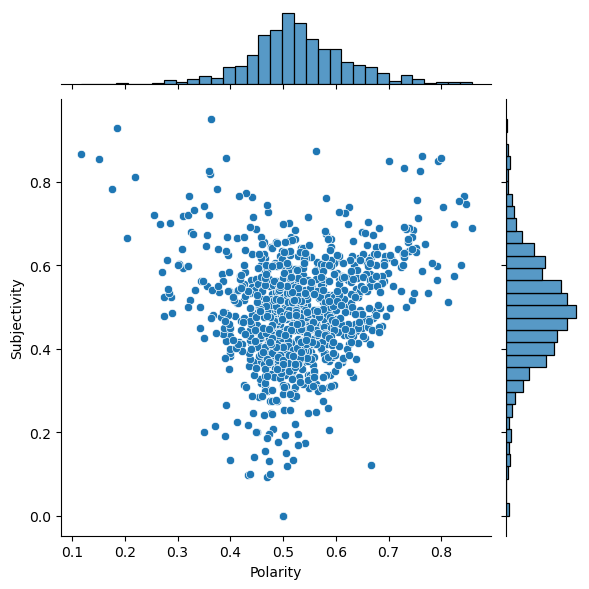

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.jointplot(data=df, x='normalized_polarity', y='subjectivity')
#sns.histplot(data=df, x='normalized_polarity', y='subjectivity', bins=3, cbar=True)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
## Other features include identifying-sentences and counting phrases:

#for i in range(1):#len(df)):
#    review = textblob.TextBlob(df['reviews'][i])
#    sentences = review.sentences
#    print(sentences)
#    print(review.noun_phrases.count('insert_phrase'))

#### Applying SQL queries:

In [ ]:
import csv, sqlite3

## Credentials of the DB2 database:
dsn_hostname = "98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "mzf99447"        # e.g. "abc12345"
dsn_pwd = "7OvJosruh343brjZ"      # e.g. "7dBZ3wWt9XN6$o0J"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "30875"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL

## Connect to the DB2 database:
%load_ext sql
%sql ibm_db_sa://mzf99447:7OvJosruh343brjZ@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/BLUDB?security=SSL


In [ ]:
## Connect to SQLite:
con = sqlite3.connect("REVIEWS.db")
cursor_obj = con.cursor()

In [ ]:
## Create the table:
drop_query = """ drop table REVIEWS;"""
cursor_obj.execute(drop_query)

createQuery = """ create table IF NOT EXISTS REVIEWS(ID INTEGER PRIMARY KEY NOT NULL, POLARITY VARCHAR(20), SUBJECTIVITY VARCHAR(20) );"""
cursor_obj.execute(createQuery)

In [ ]:
## Fill the table:
for i in range(len(df)):
    #review = df['reviews'][i]
    polarity = df['normalized_polarity'][i]
    subjectivity = df['subjectivity'][i]
    fillQuery = 'INSERT INTO REVIEWS VALUES (' + str(i) + ',' + str(polarity) + ',' + str(subjectivity) + ')'
    #print(fillQuery)
    cursor_obj.execute(fillQuery)

In [ ]:
con.commit()

%sql sqlite:///REVIEWS.db
%sql SELECT * FROM REVIEWS LIMIT 5;

In [ ]:
cursor_obj.close()

In [ ]:
## If database is locked:
#!fuser REVIEWS.db
#!kill -9 above_output_number

In [ ]:
viewQuery = "SELECT * FROM REVIEWS WHERE POLARITY > 0.66;"
df_high_polarity = pd.read_sql_query(viewQuery, con)

viewQuery = "SELECT * FROM REVIEWS WHERE POLARITY < 0.66 AND POLARITY > 0.33;"
df_medium_polarity = pd.read_sql_query(viewQuery, con)

viewQuery = "SELECT * FROM REVIEWS WHERE POLARITY < 0.33;"
df_low_polarity = pd.read_sql_query(viewQuery, con)


In [ ]:
%sql SELECT * FROM REVIEWS WHERE POLARITY < 0.3  ORDER BY POLARITY LIMIT 10;

In [ ]:
worse_reviews = [984,220,992,3,78,593,286,130,305,96]
text = ''
for i in range(len(worse_reviews)):
    text += df['reviews'][worse_reviews[i]]+'\n'
print(text)

In [ ]:
tb = textblob.TextBlob(text)
sentences = tb.sentences
for i in range(len(sentences)):
    

### WordClouds:   